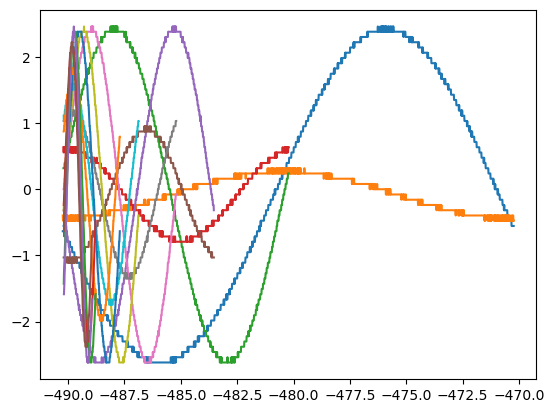

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#Der laves en liste til faseforskydningerne:
Faseforskydning = []

#Frekvenserne der er målt ved:
High = [50 , 100 , 150 , 200 , 300 , 400 , 700 , 800]

#Der gennemgås datasættes for hver eneste frekvens:
for Hz in High:
    Rådata = np.genfromtxt(f"HIGHPASS-{Hz}Hz.csv" , delimiter=',' , skip_header=2)
    
    #Dataet defineres i seperate mapper:
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2]

    #Periden og det totale antal af svinginger findes:
    Periode = 1 / Hz * 10**3
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    #Der laves en liste seperat til kanal A og B:
    SvingA = []
    SvingB = []
    #Der loopes over det totale antal af svingninger:
    for i in range(0,int(Antal_svingninger)):
        #Der laves en maske til at opdele bølgerne i de enkelte perioder:
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        
        #Der laves en seperat liste til dataet indenfor hver periode
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]

        #Hver enkelt svingning for de to kanaler A og B gemmes i seperate lister:
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    #Der plottes bare for se, om det ser okay ud:
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])

    #Der findes nu faseforskydningen mellem kanal A og B for hver periode:
    For = []
    for x in range(0,int(Antal_svingninger)):
        For.append(  ( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )

    #Frekvensen, den gennemsnitlige faseforskygning og den statistiske usikkerhed gemmes i en seperat liste:
    Faseforskydning.append([Hz , np.mean(For) , np.std(For)])